# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [123]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [124]:
#Declaramos URL como variable str
url = 'https://ycharts.com/companies/TSLA/revenues'

#Declaramos variable que envia solicitud (GET) HTTP a la URL *Descarga HTML*
html_data = requests.get(url,timeout=(5)).text #Utilizamos timeout para darle un tiempo de espera a la transacción

#Condicionamos por si la respuesta es Error 403
if "403 ERROR" in html_data:
    #Se crea un diccionario usando `User-Agent` que indetifica la consulta como si se hiciera desde un navegador tradicional (Profe Truco)
    headers = {'User-Agent':"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    #Se prepara un nuevo request con el nuevo parametro header 
    request = requests.get(url,headers=headers)
    #Se pausa la ejecucion por 5s, evita algun bloqueo de IP por solicitudes rapidas consecutivas
    time.sleep(5)
    #Realizamos nuevamente la consulta
    html_data = request.text

html_data
    


'\n\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=funct

In [125]:
#Transformación de HTML

#Con BeautifulSoup convertimos el HTML en un onjeto de Arbol de analisis, facilitando el manejo de este
soup = BeautifulSoup(html_data,'html.parser')
soup




<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [126]:
#Buscamos todas las tablas

#Buscamos todas las instancias de una etiqueta con find_all
todas_las_tablas = soup.find_all('table') # 'table'seria la etiqueta HTML que estamos buscando
todas_las_tablas

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>June 30, 2024</td>
 <td class="text-right">
                             
                                 25.50B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                   

In [127]:
#Buscamos en todas_las_tablas 

for index,table in enumerate(todas_las_tablas): #Enumerate convierte en iterable y devuelve el indice y el valor
    if ('June 30, 2012' in str(table)): #Corta la tabla en June 30, 2012 y deja de iterar
        table_index = index
        break
table_index

1

In [128]:
todas_las_tablas[table_index]

<table class="table">
<thead>
<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>March 31, 2018</td>
<td class="text-right">
                                
                                    3.409B
                                
                            </td>
</tr>
<tr>
<td>December 31, 2017</td>
<td class="text-right">
                                
                                    3.288B
                                
                            </td>
</tr>
<tr>
<td>September 30, 2017</td>
<td class="text-right">
                                
                                    2.985B
                                
                            </td>
</tr>
<tr>
<td>June 30, 2017</td>
<td class="text-right">
                                
                                    2.790B
                                
                            </td>
</tr>
<tr>
<td>March 31, 2017</td>
<td class="text-right">
                           

In [129]:
df_tesla = pd.DataFrame(columns=['Fecha','Revenue']) #Creamos un DataFrame vacío 

#Iteramos la primera parte de toda_las_tablas para limpiar y extraer los valores necesarios
for row in todas_las_tablas[0].tbody.find_all('tr'): 
    col = row.find_all('td')
    if (col != []):
        Fecha = col[0].text
        Revenue = col[1].text.replace('$','').replace('\n','').replace(' ','')
        df_tesla = pd.concat([df_tesla,pd.DataFrame({'Fecha':Fecha,'Revenue':Revenue},index=[0])],ignore_index=True)

df_tesla


,Fecha,Revenue
0,"June 30, 2024",25.50B
1,"March 31, 2024",21.30B
2,"December 31, 2023",25.17B
3,"September 30, 2023",23.35B
4,"June 30, 2023",24.93B
5,"March 31, 2023",23.33B
6,"December 31, 2022",24.32B
7,"September 30, 2022",21.45B
8,"June 30, 2022",16.93B
9,"March 31, 2022",18.76B


In [130]:
#Iteramos la segunda parte de todas_las_tablas para completar nuestra información hasta la fecha que seleccionamos
for row in todas_las_tablas[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        Fecha = col[0].text
        Revenue = col[1].text.replace('$','').replace('\n','').replace(' ','')
        df_tesla = pd.concat([df_tesla,pd.DataFrame({'Fecha':Fecha,'Revenue':Revenue},index=[0])],ignore_index=True)
        
df_tesla

,Fecha,Revenue
0,"June 30, 2024",25.50B
1,"March 31, 2024",21.30B
2,"December 31, 2023",25.17B
3,"September 30, 2023",23.35B
4,"June 30, 2023",24.93B
5,"March 31, 2023",23.33B
6,"December 31, 2022",24.32B
7,"September 30, 2022",21.45B
8,"June 30, 2022",16.93B
9,"March 31, 2022",18.76B


In [131]:
#Convertimos los valores a Millones

def de_B_a_M(Revenue):
    if 'B' in Revenue:
        salida = float(Revenue[:-1])*1000
    else:
        salida = float(Revenue[:-1])
    return salida

df_tesla['Revenue'] = df_tesla['Revenue'].apply(de_B_a_M) #Aplicamos la funcion a todos los valores de la columna


In [132]:
df_tesla.rename(columns={'Revenue': 'Revenue (M)'}, inplace=True)
df_tesla

,Fecha,Revenue (M)
0,"June 30, 2024",25500.00
1,"March 31, 2024",21300.00
2,"December 31, 2023",25170.00
3,"September 30, 2023",23350.00
4,"June 30, 2023",24930.00
5,"March 31, 2023",23330.00
6,"December 31, 2022",24320.00
7,"September 30, 2022",21450.00
8,"June 30, 2022",16930.00
9,"March 31, 2022",18760.00


In [133]:
#Cramos la conexion a sqlite3 
conexion = sqlite3.connect('Tesla.db')
conexion

In [134]:
#Creamos un cursor y creamos una table vacía
cursor = conexion.cursor()
cursor.execute("""
                CREATE TABLE IF NOT EXISTS revenue_tesla_trimestral (Fecha,Revenue)
               """)

In [135]:
#Convertimos DataFrame en una lista de tuplas estructurada
tuplas = list(df_tesla.to_records(index=False))
tuplas

[np.record(('June 30, 2024', 25500.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('March 31, 2024', 21300.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('December 31, 2023', 25170.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('September 30, 2023', 23350.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('June 30, 2023', 24930.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('March 31, 2023', 23330.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('December 31, 2022', 24320.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('September 30, 2022', 21450.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('June 30, 2022', 16930.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('March 31, 2022', 18760.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.record(('December 31, 2021', 17720.0), dtype=[('Fecha', 'O'), ('Revenue (M)', '<f8')]),
 np.rec

In [136]:
#Introducimos la lista de tuplas en nuesta tabla sqlite
cursor.executemany('INSERT INTO revenue_tesla_trimestral VALUES (?,?)',tuplas)
conexion.commit()

In [137]:
#Recuperamos las filas de la tabla de sqlite 
resultado = cursor.execute('select * from revenue_tesla_trimestral')

for row in resultado:
    print(row)

('June 30, 2024', 25500.0)
('March 31, 2024', 21300.0)
('December 31, 2023', 25170.0)
('September 30, 2023', 23350.0)
('June 30, 2023', 24930.0)
('March 31, 2023', 23330.0)
('December 31, 2022', 24320.0)
('September 30, 2022', 21450.0)
('June 30, 2022', 16930.0)
('March 31, 2022', 18760.0)
('December 31, 2021', 17720.0)
('September 30, 2021', 13760.0)
('June 30, 2021', 11960.0)
('March 31, 2021', 10390.0)
('December 31, 2020', 10740.0)
('September 30, 2020', 8771.0)
('June 30, 2020', 6036.0)
('March 31, 2020', 5985.0)
('December 31, 2019', 7384.0)
('September 30, 2019', 6303.0)
('June 30, 2019', 6350.0)
('March 31, 2019', 4541.0)
('December 31, 2018', 7226.0)
('September 30, 2018', 6824.0)
('June 30, 2018', 4002.0)
('March 31, 2018', 3409.0)
('December 31, 2017', 3288.0)
('September 30, 2017', 2985.0)
('June 30, 2017', 2790.0)
('March 31, 2017', 2696.0)
('December 31, 2016', 2285.0)
('September 30, 2016', 2298.0)
('June 30, 2016', 1270.0)
('March 31, 2016', 1147.0)
('December 31, 2015'

In [138]:
#Creamos una 2da tabla sqlite para probar un método de pandas para pasar todo el datafram a sqlite
#No Funciona dos veces ya que la tabla ya existiría
df_tesla.to_sql('revenue2',con=conexion,index=False)

ValueError: Table 'revenue2' already exists.

In [121]:
resultado2 = cursor.execute('select * from revenue2')

for row in resultado2:
    print(row)

#Mismo resultado que el primer método

('June 30, 2024', 25500.0)
('March 31, 2024', 21300.0)
('December 31, 2023', 25170.0)
('September 30, 2023', 23350.0)
('June 30, 2023', 24930.0)
('March 31, 2023', 23330.0)
('December 31, 2022', 24320.0)
('September 30, 2022', 21450.0)
('June 30, 2022', 16930.0)
('March 31, 2022', 18760.0)
('December 31, 2021', 17720.0)
('September 30, 2021', 13760.0)
('June 30, 2021', 11960.0)
('March 31, 2021', 10390.0)
('December 31, 2020', 10740.0)
('September 30, 2020', 8771.0)
('June 30, 2020', 6036.0)
('March 31, 2020', 5985.0)
('December 31, 2019', 7384.0)
('September 30, 2019', 6303.0)
('June 30, 2019', 6350.0)
('March 31, 2019', 4541.0)
('December 31, 2018', 7226.0)
('September 30, 2018', 6824.0)
('June 30, 2018', 4002.0)
('March 31, 2018', 3409.0)
('December 31, 2017', 3288.0)
('September 30, 2017', 2985.0)
('June 30, 2017', 2790.0)
('March 31, 2017', 2696.0)
('December 31, 2016', 2285.0)
('September 30, 2016', 2298.0)
('June 30, 2016', 1270.0)
('March 31, 2016', 1147.0)
('December 31, 2015'

<BarContainer object of 50 artists>

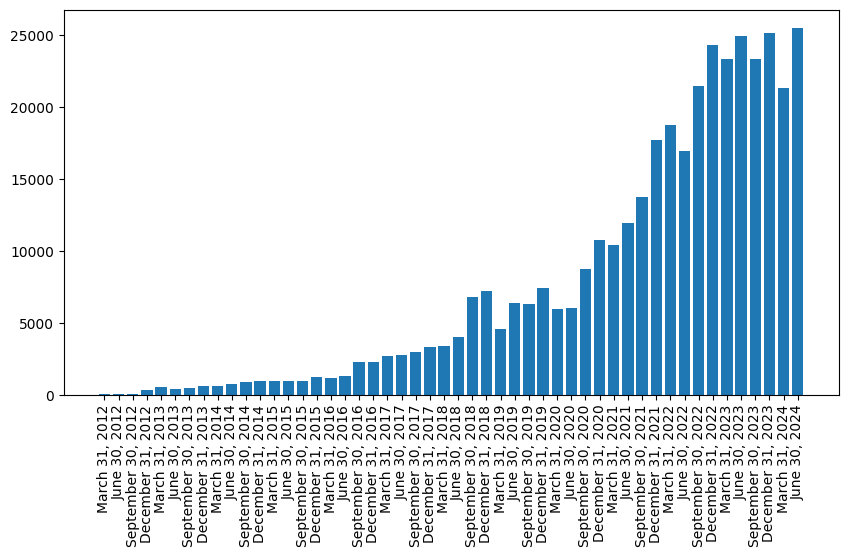

In [140]:
#Gráficamos datos 

plt.figure(figsize=(10,5))

#Barras
plt.xticks(rotation=90) #Giramos nombre de los datos en x para mejor visualización
plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue (M)'][::-1]) #Se voltea el orden de los datos para ver de menor a mayor

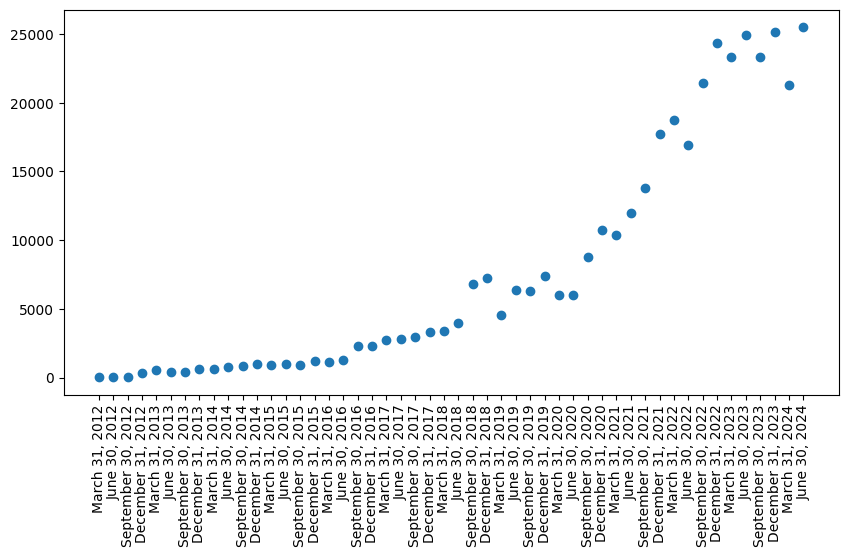

In [141]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)

#ScatterPlot
plt.scatter(df_tesla['Fecha'][::-1],df_tesla['Revenue (M)'][::-1])
plt.show()

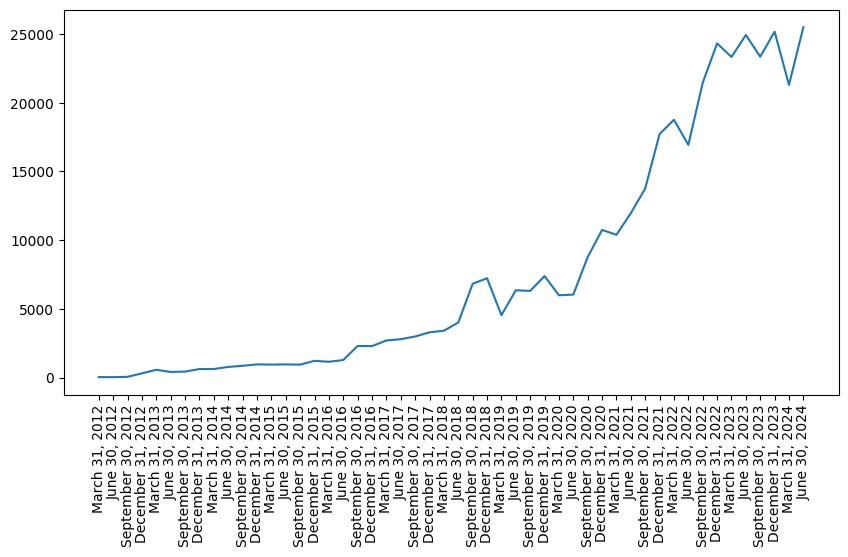

In [143]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)

#Lineas
plt.plot(df_tesla['Fecha'][::-1],df_tesla['Revenue (M)'][::-1])
plt.show()

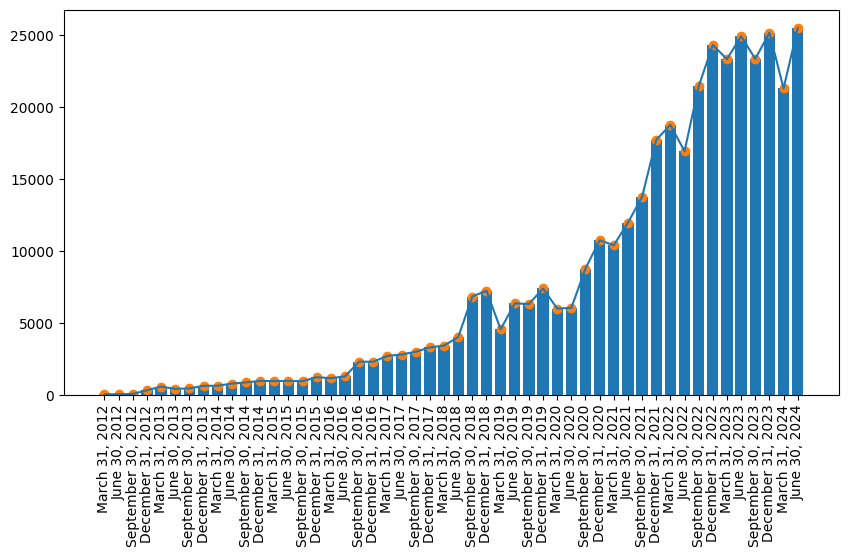

In [148]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)

#Lineas
plt.plot(df_tesla['Fecha'][::-1],df_tesla['Revenue (M)'][::-1])
#Barras
plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue (M)'][::-1])
#ScatterPlot
plt.scatter(df_tesla['Fecha'][::-1],df_tesla['Revenue (M)'][::-1])


plt.show()